In [66]:
import os

import numpy as np
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
import seaborn as sns

from sklearn import svm
from sklearn.model_selection import train_test_split

sns.set(style="darkgrid")
sns.set_context('talk')
%matplotlib inline

In [3]:
import os
import numpy as np
import h5py as h5
import argparse
# import gym
# import gym_minigrid
import time
import torch
from torch_ac.utils.penv import ParallelEnv

import utils


In [5]:
model_dir = utils.get_model_dir('DoorKey')
model = utils.load_model(model_dir)
# agent = utils.Agent(args.env, env.observation_space, model_dir, args.argmax, args.procs)

In [13]:
model

ACModel(
  (image_conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
    (4): ReLU()
    (5): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
    (6): ReLU()
  )
  (memory_rnn): LSTMCell(64, 64)
  (actor): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=7, bias=True)
  )
  (critic): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [50]:
actor_head = model.actor[0]
ahw = actor_head.weight.detach().numpy()
ahb = actor_head.bias.detach().numpy()

In [51]:
ahw

array([[ 0.17232966,  0.02507388,  0.20359753, ...,  0.26286098,
        -0.09315054, -0.00151712],
       [-0.17038955,  0.17826244, -0.30980602, ..., -0.19290946,
        -0.39637768,  0.03497703],
       [-0.05213808,  0.15447614,  0.13795066, ...,  0.00113132,
        -0.1775171 , -0.14787374],
       ...,
       [ 0.14453237, -0.23521599,  0.1801649 , ..., -0.04726236,
        -0.16657038, -0.13540968],
       [-0.00998776, -0.07161547,  0.16602863, ...,  0.17938413,
         0.08216537, -0.08886909],
       [-0.06968242, -0.10022893, -0.17993952, ..., -0.1440268 ,
         0.03256406,  0.16338469]], dtype=float32)

In [53]:
ahb

array([ 0.0294999 , -0.08828674, -0.02406261,  0.0267463 , -0.02237744,
        0.05916514, -0.03162538, -0.08617909, -0.03338338,  0.08465745,
       -0.03438688,  0.05227507,  0.09541309,  0.03543174,  0.09275462,
        0.04266991, -0.03686861,  0.02434628,  0.04432162, -0.0321303 ,
        0.1122798 ,  0.0264534 , -0.01685069,  0.01895974,  0.00428871,
       -0.02994668, -0.01171397, -0.00519195,  0.07558285, -0.02165823,
       -0.05762239, -0.0263385 , -0.01625484,  0.03175391, -0.07015878,
        0.05041719,  0.07347718,  0.02193355,  0.14226471, -0.06681176,
       -0.08258553,  0.01917772,  0.10644446, -0.05286755,  0.04307289,
        0.02420614,  0.05935454,  0.01932169,  0.09382256,  0.01888077,
       -0.00441878, -0.09608973,  0.01200302,  0.01037103,  0.02275301,
       -0.04743293,  0.10509191,  0.06671234, -0.02521496, -0.01675962,
       -0.13134682,  0.00032597,  0.02702522, -0.04666618], dtype=float32)

In [54]:
(ahw@feature_data[7][0])+ahb

array([-0.32390857,  0.08320041, -0.1166339 ,  0.24930912, -0.68160975,
       -0.17133002,  0.31137967, -0.1638031 , -0.02876564,  0.01962846,
        0.5993317 ,  0.57111275,  0.32003182,  0.20981455,  0.6909225 ,
        0.19688368,  0.435775  ,  0.20728083,  0.5068573 , -0.30566087,
        0.36965057,  0.34814703,  0.09334686,  0.705111  ,  0.125296  ,
       -0.4965709 , -0.22729632,  0.18315035,  0.06389563, -0.6626813 ,
       -0.03704918, -0.9881874 ,  0.04320236, -0.30354297,  0.3977227 ,
       -0.43521476,  0.23128198, -0.5090802 ,  0.6475094 , -0.107636  ,
        0.06515826, -0.16587046,  0.3213089 ,  0.59880924,  0.5283779 ,
        0.6139905 ,  0.33300832, -0.3699662 ,  0.15845709, -0.07811967,
       -0.2102731 , -0.10170937, -0.14770813,  0.45853496,  0.24775295,
       -0.6513399 ,  0.238044  , -0.6681406 ,  0.42124093, -0.2626414 ,
       -0.35191604, -0.238468  , -0.32171047, -0.40933862], dtype=float32)

In [55]:
(ahw[0,:]@feature_data[7][0])+ahb[0]

-0.32390854

In [40]:
feature_data[8][0]

array([-0.32373047,  0.08319092, -0.11657715,  0.24926758, -0.6816406 ,
       -0.17126465,  0.3112793 , -0.16381836, -0.02879333,  0.01963806,
        0.5991211 ,  0.57128906,  0.32006836,  0.20983887,  0.69091797,
        0.19689941,  0.43579102,  0.20727539,  0.50683594, -0.30566406,
        0.3696289 ,  0.34814453,  0.09332275,  0.7050781 ,  0.12524414,
       -0.49658203, -0.22729492,  0.18310547,  0.06384277, -0.66259766,
       -0.03701782, -0.98828125,  0.04318237, -0.3034668 ,  0.39770508,
       -0.4350586 ,  0.23120117, -0.50878906,  0.64746094, -0.10766602,
        0.06512451, -0.16589355,  0.32128906,  0.5986328 ,  0.5283203 ,
        0.61376953,  0.3330078 , -0.36987305,  0.15844727, -0.07806396,
       -0.21020508, -0.10168457, -0.14758301,  0.4584961 ,  0.24780273,
       -0.6513672 ,  0.23803711, -0.66796875,  0.42114258, -0.2626953 ,
       -0.35180664, -0.23840332, -0.32177734, -0.40942383], dtype=float32)

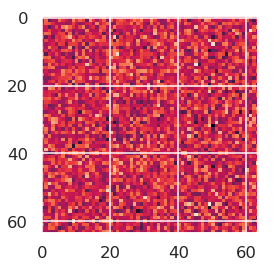

In [67]:
plt.imshow(ahw)

array([ 7.325044 ,  8.492449 ,  9.502354 ,  8.206432 ,  7.07435  ,
        6.5327897,  7.809168 ,  7.3970566,  8.954433 ,  8.677032 ,
        7.47232  ,  8.680883 ,  7.747442 ,  9.5213995,  6.9806113,
        6.7873363,  7.5836773,  6.196326 ,  8.687448 , 10.355076 ,
        8.083647 , 12.249968 ,  9.57732  ,  7.3257537,  5.8821077,
        6.626351 , 10.044676 ,  7.8871393,  8.515125 , 10.204151 ,
        7.073558 ,  7.842338 ,  6.6791835,  7.6978226, 11.826339 ,
        7.454284 ,  6.8417134,  6.0948224,  7.29818  ,  6.6496873,
        6.5131135,  8.538354 ,  7.377222 , 10.191737 ,  5.7849627,
       12.412073 ,  6.5503025,  8.080021 ,  7.960848 , 10.25119  ,
       10.426723 ,  8.234846 ,  8.858182 ,  8.261708 , 10.044177 ,
        7.3617606,  7.4245872,  8.412764 ,  9.640496 ,  8.094321 ,
        7.313072 ,  8.026748 ,  8.415476 ,  8.798803 ], dtype=float32)

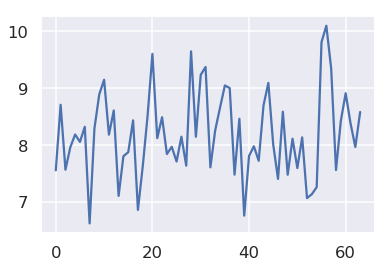

In [73]:
plt.plot(np.abs(ahw).sum(axis=1))

In [60]:
ahw_f = pd.DataFrame(ahw)

In [109]:
def random_projection1(X, N_cur):
    np.random.seed(0)
    N = X.shape[1]  # original feature #
    W = np.random.randn(N, N_cur) # randn([pix # x neuron #])
    W = W/np.tile(np.sqrt((W**2).sum(axis=0)), [N,1]) # normalize columns of W
    X_proj = np.zeros([X.shape[0],N_cur])
    print('running random projection, X shape: {}, W shape: {}'.format(X.shape, W.shape))
    for i, x in enumerate(X):
        X_proj[i, :] = np.dot(x,W)
    
    return X_proj

def random_projection2(X, N_cur):
    np.random.seed(0)
    N = X.shape[1]  # original feature #
    W = np.random.randn(N, N_cur) # randn([pix # x neuron #])
    W = W/np.tile(np.sqrt((W**2).sum(axis=0)), [N,1]) # normalize columns of W
    return np.dot(X,W) # project stimuli onto W


In [110]:
X = np.random.randn(100,30)

In [111]:
random_projection1(X, 10)

running random projection, X shape: (100, 30), W shape: (30, 10)


array([[ 1.86536003e-01, -6.14734259e-01,  9.05929777e-01,
         4.26640136e-01, -3.25061683e-01,  1.17306967e+00,
         1.03245398e+00, -4.77527697e-01, -1.01184219e+00,
         9.75334649e-01],
       [ 9.52881454e-01,  4.66542418e-01,  1.29274707e+00,
        -1.08242222e-01,  1.18661248e+00,  2.30209255e-01,
        -1.09902430e-01, -2.00093431e-01,  1.13388790e+00,
         1.09823469e+00],
       [-6.35700424e-02,  1.48444218e+00, -5.55912335e-01,
        -1.12856097e-01,  1.46961360e+00, -3.91791899e-01,
        -3.25360701e-01,  1.51517516e+00,  2.19249932e+00,
        -7.63168919e-02],
       [ 8.55770816e-02,  3.37334901e-01,  1.58458349e+00,
        -4.24622752e-01, -5.62102529e-01,  2.48990152e-01,
        -4.85421721e-01,  3.56735489e-01, -4.43647651e-01,
         2.37762498e-01],
       [-3.50919027e-02, -9.42018526e-02, -1.19867950e+00,
        -1.14881616e-02, -1.24868369e+00, -2.08412760e-01,
         4.80966588e-01,  3.95791904e-01, -6.31782830e-01,
        -1.

In [108]:
random_projection2(X, 10)

array([[ 1.86536003e-01, -6.14734259e-01,  9.05929777e-01,
         4.26640136e-01, -3.25061683e-01,  1.17306967e+00,
         1.03245398e+00, -4.77527697e-01, -1.01184219e+00,
         9.75334649e-01],
       [ 9.52881454e-01,  4.66542418e-01,  1.29274707e+00,
        -1.08242222e-01,  1.18661248e+00,  2.30209255e-01,
        -1.09902430e-01, -2.00093431e-01,  1.13388790e+00,
         1.09823469e+00],
       [-6.35700424e-02,  1.48444218e+00, -5.55912335e-01,
        -1.12856097e-01,  1.46961360e+00, -3.91791899e-01,
        -3.25360701e-01,  1.51517516e+00,  2.19249932e+00,
        -7.63168919e-02],
       [ 8.55770816e-02,  3.37334901e-01,  1.58458349e+00,
        -4.24622752e-01, -5.62102529e-01,  2.48990152e-01,
        -4.85421721e-01,  3.56735489e-01, -4.43647651e-01,
         2.37762498e-01],
       [-3.50919027e-02, -9.42018526e-02, -1.19867950e+00,
        -1.14881616e-02, -1.24868369e+00, -2.08412760e-01,
         4.80966588e-01,  3.95791904e-01, -6.31782830e-01,
        -1.

In [30]:
get_data = lambda path : h5.File(path, 'r')['obj_arr'].value.astype('float32')[:,0]
flatten = lambda x : x.reshape(x.shape[0], -1)

def format_data(DIR):
    files = [os.path.join(DIR,file) for file in os.listdir(DIR)]
    feature_files = [file for file in files if 'features' in file]
    feature_names = [feature_file.split('/')[-1].split('(')[0] for feature_file in feature_files]
    feature_data = [flatten(get_data(feature_file)) for feature_file in feature_files]

    obss_file = [file for file in files if 'obss' in file][0]
    obss_data = flatten(get_data(obss_file))

    annotation_file = [file for file in files if 'annotations' in file][0]
    annotation_data = pd.read_csv(annotation_file)
    
    feature_names, feature_data = please_behave(feature_names, feature_data)
    
    return feature_names, feature_data, obss_data, annotation_data

def please_behave(feature_names, feature_data):
    feature_nums = np.array([int(feature_name.split('_')[1]) for feature_name in feature_names])
    inds = feature_nums.argsort()
    feature_names = [feature_names[i] for i in inds]
    feature_data = [feature_data[i] for i in inds]
    return feature_names, feature_data

def get_annotations(annotation_data, i, j, key):
    x = np.arange(len(feature_data[i]))
    y = annotation_data[key].values.astype(int)*(j)
    xy = np.array([[x,y] for (x,y) in zip(x,y) if y!=0])
    return xy[:,0], xy[:,1]

In [31]:
DIR = 'feature_dir/DoorKey/env_MiniGrid-DoorKey-16x16-v0-ep_12-return_0.9820703268051147-frames_51.0/'
feature_names, feature_data, obss_data, annotation_data = format_data(DIR)

In [3]:
DIR = 'feature_dir/DoorKey/env_MiniGrid-DoorKey-16x16-v0-ep_14-return_0.9831249713897705-frames_48.0/'
feature_names, feature_data, obss_data, annotation_data = format_data(DIR)

In [5]:
feature_names

['features_0_Conv2d',
 'features_1_ReLU',
 'features_2_MaxPool2d',
 'features_3_Conv2d',
 'features_4_ReLU',
 'features_5_Conv2d',
 'features_6_ReLU',
 'features_7_LSTMCell',
 'features_8_Linear',
 'features_9_Tanh',
 'features_10_Linear',
 'features_11_Linear',
 'features_12_Tanh',
 'features_13_Linear']

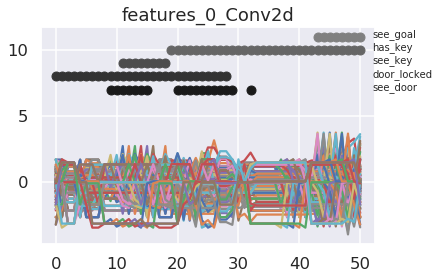

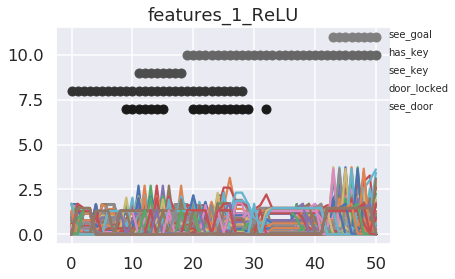

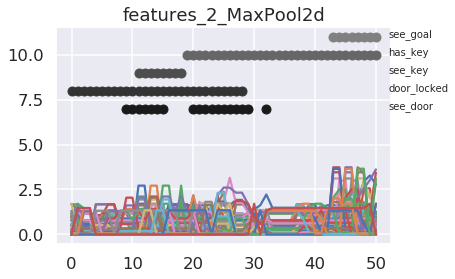

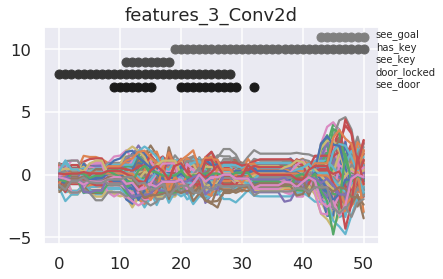

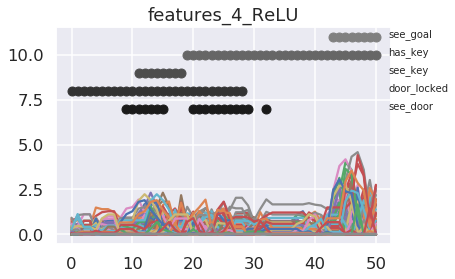

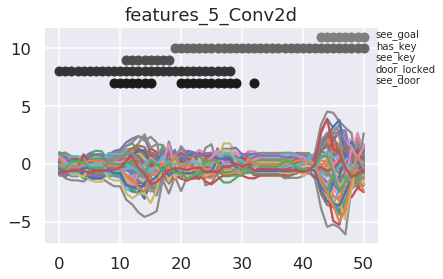

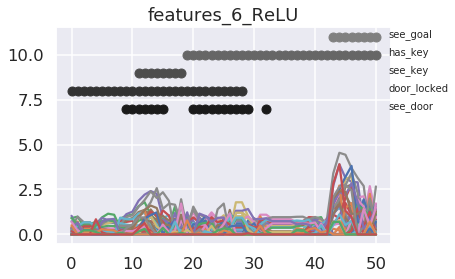

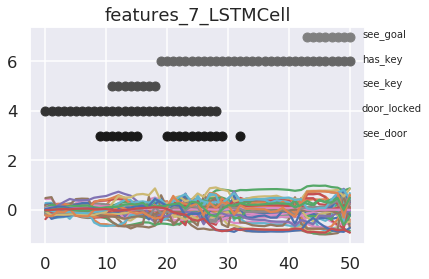

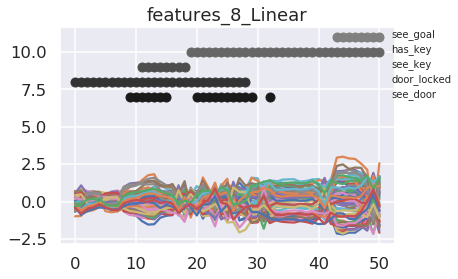

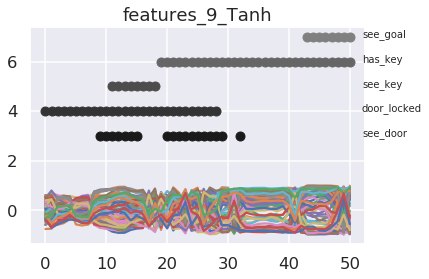

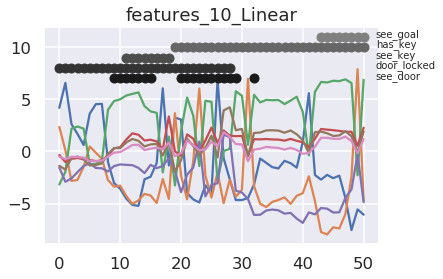

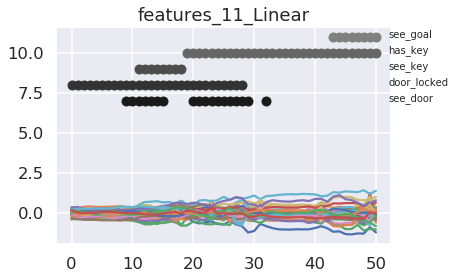

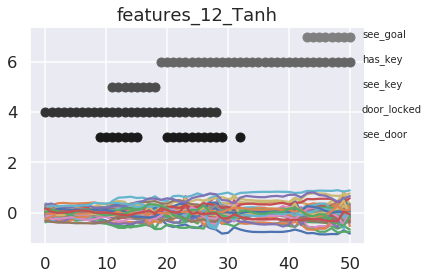

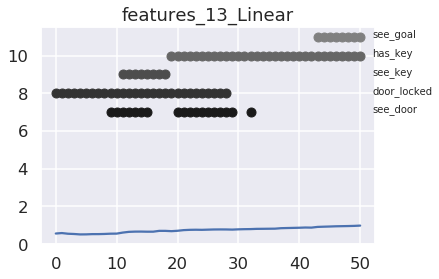

In [4]:
for i, name in enumerate(feature_names):
    ax = plt.plot(np.arange(len(feature_data[i])), feature_data[i])
    for j, key in enumerate(annotation_data.keys()):
        if 'Unnamed' in key:
            pass
        else:
            if ('Tanh' in name) or ('LSTM' in name): 
                m=2 
            else: 
                m=6
            k = (j+m)
            x,y = get_annotations(annotation_data, i, k, key)
            plt.plot(x, y, linestyle='none', marker='o', color=(j/10,j/10,j/10))
            plt.text(len(feature_data[i])+1, k, key)
    plt.title(feature_names[i])
    plt.show()

In [12]:
def softmax(X, beta=1.0, axis=None):
    """ 
    Compute the softmax of each element along an axis of X.

    Parameters
    ----------
    X: ND-Array. Probably should be floats. 
    beta (optional): float parameter, used as a multiplier
        prior to exponentiation. Default = 1.0
    axis (optional): axis to compute values along. Default is the 
        first non-singleton axis.

    Returns an array the same size as X. The result will sum to 1
    along the specified axis.
    """

    # make X at least 2d
    y = np.atleast_2d(X)

    # find axis
    if axis is None:
        axis = next(j[0] for j in enumerate(y.shape) if j[1] > 1)

    # multiply y against the theta parameter, 
    y = y * float(beta)

    # subtract the max for numerical stability
    y = y - np.expand_dims(np.max(y, axis = axis), axis)
    
    # exponentiate y
    y = np.exp(y)

    # take the sum along the specified axis
    ax_sum = np.expand_dims(np.sum(y, axis = axis), axis)

    # finally: divide elementwise
    p = y / ax_sum

    # flatten if X was 1D
    if len(X.shape) == 1: p = p.flatten()

    return p


In [17]:
actor = feature_data[10]
actor_s = softmax(actor, axis=1)

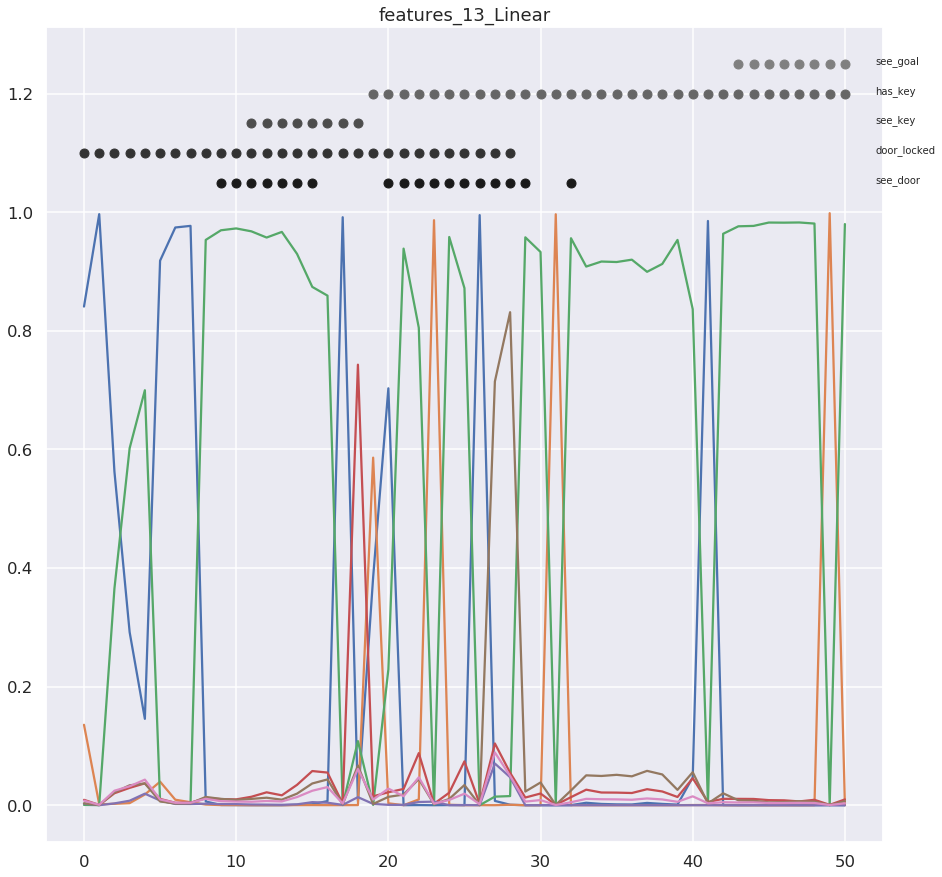

In [22]:
fig, ax = plt.subplots(figsize=[15,15])
plt.plot(actor_s)
for j, key in enumerate(annotation_data.keys()):
    if 'Unnamed' in key:
        pass
    else:
        m = 20
        k = (j+m)/m
        x,y = get_annotations(annotation_data, i, k, key)
        plt.plot(x, y, linestyle='none', marker='o', color=(j/10,j/10,j/10))
        plt.text(len(feature_data[i])+1, k, key)
plt.title(feature_names[i])
plt.show()

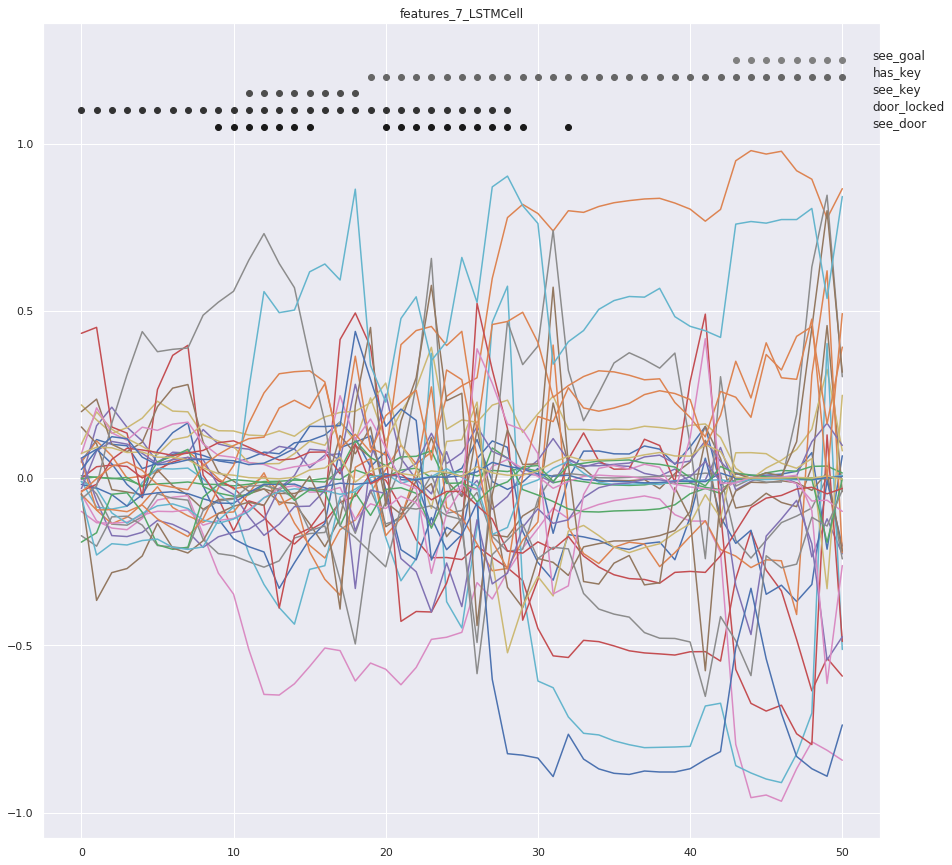

In [195]:
i = 7
name = 'LSTM'
fig, ax = plt.subplots(figsize=[15,15])
plt.plot(np.arange(len(feature_data[i])), feature_data[i][:,::2])
for j, key in enumerate(annotation_data.keys()):
    if 'Unnamed' in key:
        pass
    else:
        m = 20
        k = (j+m)/m
        x,y = get_annotations(annotation_data, i, k, key)
        plt.plot(x, y, linestyle='none', marker='o', color=(j/10,j/10,j/10))
        plt.text(len(feature_data[i])+1, k, key)
plt.title(feature_names[i])
plt.show()

In [12]:
angle = lambda x, y : (np.dot(x,y))/(np.linalg.norm(x)*np.linalg.norm(y))

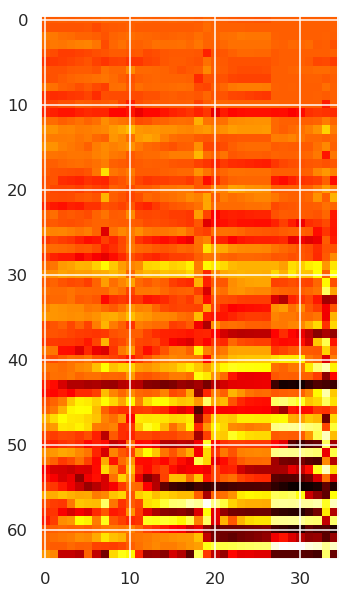

In [72]:
fig = plt.figure(1, figsize=[20,10])
fig.clf()
ax = fig.add_subplot(1, 1, 1)
var_ind = np.argsort(np.std(lstm, axis=0))
ax.imshow(lstm.T[var_ind], cmap='hot', interpolation='nearest')
plt.show()

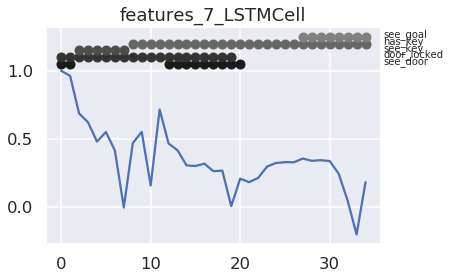

In [48]:
angles = [angle(lstm[0], lstm[i]) for i in range(len(lstm))]
plt.plot(angles)
for j, key in enumerate(annotation_data.keys()):
    if 'Unnamed' in key:
        pass
    else:
        m = 20
        k = (j+m)/m
        x,y = get_annotations(annotation_data, i, k, key)
        plt.plot(x, y, linestyle='none', marker='o', color=(j/10,j/10,j/10))
        plt.text(len(feature_data[i])+1, k, key)
plt.title(feature_names[i])
plt.show()

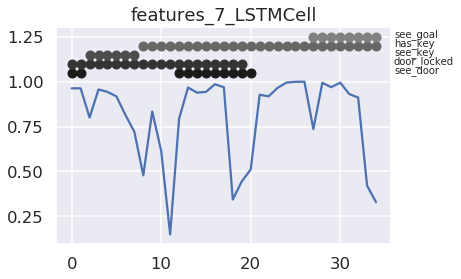

In [31]:
angles = np.concatenate([[angle(lstm[0], lstm[1])],[angle(lstm[i], lstm[i+1]) for i in range(len(lstm)-1)]])
plt.plot(angles)
for j, key in enumerate(annotation_data.keys()):
    if 'Unnamed' in key:
        pass
    else:
        m = 20
        k = (j+m)/m
        x,y = get_annotations(annotation_data, i, k, key)
        plt.plot(x, y, linestyle='none', marker='o', color=(j/10,j/10,j/10))
        plt.text(len(feature_data[i])+1, k, key)
plt.title(feature_names[i])
plt.show()

## okkkk, lets get more data?

In [150]:
feature_names_i

array(['features_0_Conv2d', 'features_1_ReLU', 'features_2_MaxPool2d',
       'features_3_Conv2d', 'features_4_ReLU', 'features_5_Conv2d',
       'features_6_ReLU', 'features_7_LSTMCell', 'features_8_Linear',
       'features_9_Tanh', 'features_10_Linear', 'features_11_Linear',
       'features_12_Tanh', 'features_13_Linear'], dtype='<U20')

In [190]:
# compile all data!
root = 'feature_dir/DoorKey/'
DIRS = [os.path.join(root,DIR) for DIR in os.listdir(root)]

for i, DIR in enumerate(DIRS):
    if i == 0:
        feature_names, feature_data, obss_data, annotation_data = format_data(DIR)
        annotation_data['DIR'] = DIR
        annotation_data['trial'] = i
    else:
        feature_names_i, feature_data_i, obss_data_i, annotation_data_i = format_data(DIR)
        annotation_data_i['DIR'] = DIR
        annotation_data_i['trial'] = i
        assert(np.all([f==i for (f,i) in zip (feature_names,feature_names_i)]))
        for j in range(len(feature_data)):
            feature_data[j] = np.concatenate([feature_data[j],feature_data_i[j]])
        obss_data = np.concatenate([obss_data, obss_data_i])
        annotation_data = annotation_data.append(annotation_data_i)

# for convenience we'll just call the inputs a feature
feature_data.append(obss_data)
feature_names.append('obss_-1')

# compute goal state
annotation_data['goal'] = (annotation_data['has_key'].astype(int) + (annotation_data['door_locked']==False).astype(int)).values

In [6]:
len(obss_data), len(feature_data[0]), annotation_data.shape[0]

(4960, 4960, 4960)

In [6]:
feature_names

['features_12_Tanh',
 'features_3_Conv2d',
 'features_1_ReLU',
 'features_7_LSTMCell',
 'features_5_Conv2d',
 'features_10_Linear',
 'features_8_Linear',
 'features_2_MaxPool2d',
 'features_13_Linear',
 'features_4_ReLU',
 'features_11_Linear',
 'features_0_Conv2d',
 'features_6_ReLU',
 'features_9_Tanh',
 'obss_-1']

In [34]:
A = np.matrix([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
m = A.mean(axis=1)
A - A.mean(axis=1)

matrix([[-1.,  0.,  1.],
        [-1.,  0.,  1.],
        [-1.,  0.,  1.],
        [-1.,  0.,  1.]])

In [52]:
# get LSTM data 
lstm = feature_data[7]
lstm = lstm - lstm.mean(axis=0)
lstm = lstm.T
M = np.corrcoef(lstm)

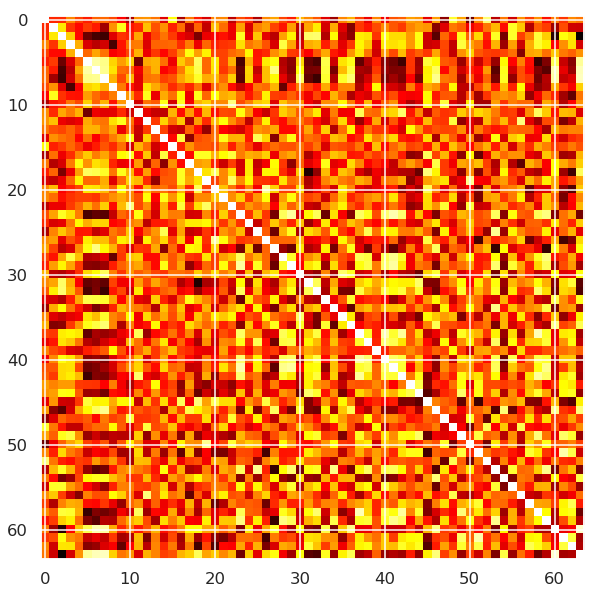

In [53]:
fig = plt.figure(1, figsize=[20,10])
fig.clf()
ax = fig.add_subplot(1, 1, 1)
# var_ind = np.argsort(np.std(lstm, axis=0))
ax.imshow(M, cmap='hot', interpolation='nearest')
plt.show()

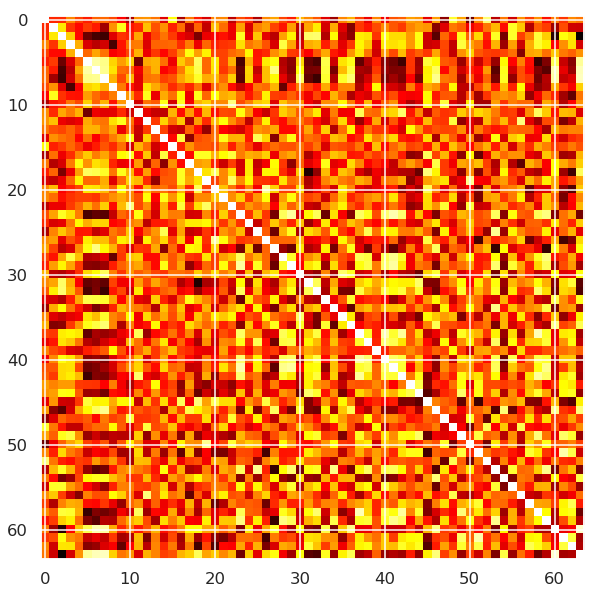

In [28]:
fig = plt.figure(1, figsize=[20,10])
fig.clf()
ax = fig.add_subplot(1, 1, 1)
# var_ind = np.argsort(np.std(lstm, axis=0))
ax.imshow(M, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
feature_data[7]

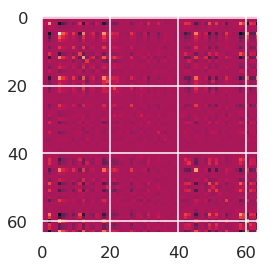

In [11]:
plt.imshow((feature_data[7].T@feature_data[7]))

In [54]:
from sklearn.decomposition import PCA

def get_EV(dataset):
    data = dataset.reshape(-1,dataset.shape[-1])
    pca = PCA()
    pca.fit(data)

    return pca.explained_variance_ratio_

def get_PR(dataset):
    data = dataset.reshape(-1,dataset.shape[-1])
    pca = PCA()
    pca.fit(data)

    u = pca.explained_variance_
    pr = np.square(u.sum())/np.square(u).sum()
    
    return pr

def svd_whiten(X):
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    X_white = np.dot(U, Vt)

    return X_white

def hist(d):
    pd.DataFrame(d).hist() 

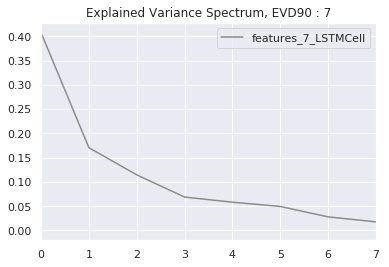

In [143]:
EVs = []
titles = []
for i, (feature_name, feature_datum) in enumerate(zip(feature_names, feature_data)):
#     if feature_name in ['features_1_ReLU', 'features_4_ReLU', 'features_6_ReLU', 'features_7_LSTMCell']:
    if feature_name in ['features_7_LSTMCell']:
        EV = get_EV(feature_datum)
#         EV = EV/np.max(EV)
        EV_frame = pd.DataFrame(columns=[feature_name],data=EV)
        ax = sns.lineplot(data=EV_frame, palette=[sns.color_palette()[i]])
#         ax.set_xscale('log')
#         ax.set_yscale('log')
        ax.set_xlim([0,7])
        EVD = np.sum([EV.cumsum()<.9])
        ax.set_title('Explained Variance Spectrum, EVD90 : {}'.format(EVD))

In [55]:
feature_names[7]

'features_7_LSTMCell'

In [60]:
state = annotation_data['goal'].values[:51]
x[state==0].shape

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4960 but corresponding boolean dimension is 51

In [62]:
state = annotation_data['goal'].values

In [63]:
state.shape

(4960,)

In [153]:
x = feature_data[7][:51]
x.shape

(51, 64)

In [57]:
x = feature_data[7]
n = 3
pcs = ['pc'+str(i) for i in range(n)]
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns=pcs)

In [58]:
principalDf.shape

(4960, 3)

In [67]:
goal_traj.shape

(22, 3)

In [71]:
cmap = {
    0 : 'g',
    1 : 'y',
    2 : 'r'
}

In [85]:
sns.set()

In [94]:
principalDf.values.shape

(4960, 3)

In [98]:
principalDf.head()

,pc0,pc1,pc2
0,-1.479360,0.660544,0.282753
1,-1.532631,0.286424,0.733241
2,-1.244807,-0.402898,0.479342
3,-1.321599,-0.468323,0.371182
4,-1.404534,-0.382538,0.217183


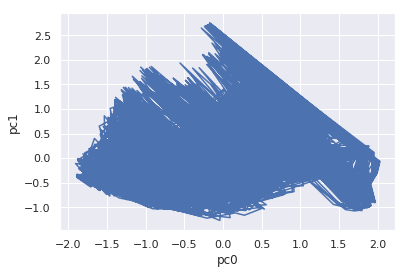

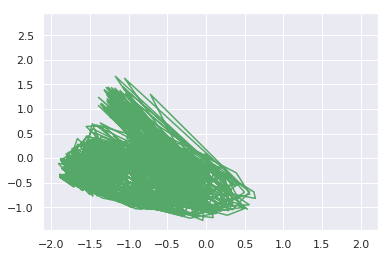

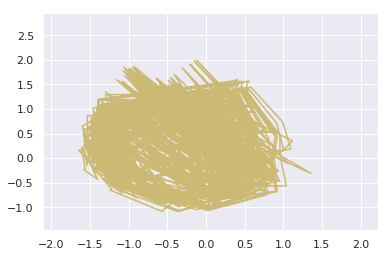

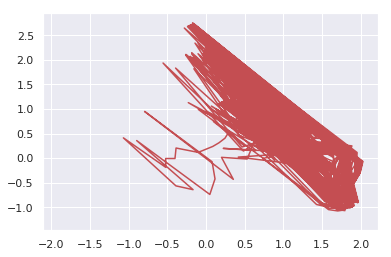

In [113]:
# outline linear projection of manifold
ax = sns.lineplot(x='pc0', y='pc1', sort=False, data=principalDf)
xlims = ax.get_xlim()
ylims = ax.get_ylim()
plt.show()

# project a single trace annotated by goal states onto manifold
all_trial_traj = principalDf.values[:]
all_trial_state = annotation_data['goal'].values[:]
for goal in range(0,3):
    goal_traj = all_trial_traj[all_trial_state==goal]
    ax = sns.lineplot(goal_traj[:,0],goal_traj[:,1], sort=False, color=cmap[goal])
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    plt.show()

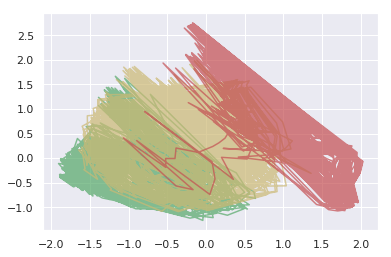

In [115]:
# project a single trace annotated by goal states onto manifold
all_trial_traj = principalDf.values[:]
all_trial_state = annotation_data['goal'].values[:]
for goal in range(0,3):
    goal_traj = all_trial_traj[all_trial_state==goal]
    ax = plt.plot(goal_traj[:,0],goal_traj[:,1], color=cmap[goal], alpha=0.7)

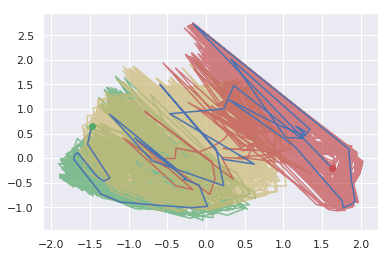

In [116]:
# project a single trace annotated by goal states onto manifold
all_trial_traj = principalDf.values[:]
all_trial_state = annotation_data['goal'].values[:]
for goal in range(0,3):
    goal_traj = all_trial_traj[all_trial_state==goal]
    ax = plt.plot(goal_traj[:,0],goal_traj[:,1], color=cmap[goal], alpha=0.7)

ax = plt.plot(principalDf.values[:51,0],principalDf.values[:51,1], c='b')

ax = plt.scatter(principalDf.values[0,0],principalDf.values[0,1], c='g', zorder=3)
ax = plt.scatter(principalDf.values[50,0],principalDf.values[50,1], c='r', zorder=3)

In [121]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

# x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()

start = 0
end = 51
state = annotation_data['goal'].values[start:end]
traj = principalDf.values[:]
ep = principalDf.values[start:end]

traces = []

for s in np.unique(state):
    goal_traj = all_trial_traj[all_trial_state==s]
    color = 'rgb({}, 200, 200)'.format(60+s*90)
    traces.append(go.Scatter3d(
        x=goal_traj[:2000,0],
        y=goal_traj[:2000,1],
        z=goal_traj[:2000,2],
    #     x=principalDf.values[:51,0],
    #     y=principalDf.values[:51,1],
    #     z=principalDf.values[:51,2],
        mode='markers',
        marker=dict(
            size=12,
            line=dict(
                color=color,
                width=0.2
            ),
            opacity=0.1
        )
    ))

for s in np.unique(state):
    color = 'rgb({}, 200, 200)'.format(60+s*90)
    print(color)
    traces.append(go.Scatter3d(
        x=ep[state==s,0],
        y=ep[state==s,1],
        z=ep[state==s,2],
        mode='lines+markers',
        line=dict(
            width=8
        ),
        marker=dict(
            color=color,
            size=8,
            symbol='circle',
            line=dict(
                color='rgb(204, 204, 204)',
                width=1
            ),
            opacity=0.9
        )
    ))

traces.append(go.Scatter3d(
    x=[principalDf.values[start,0]],
    y=[principalDf.values[start,1]],
    z=[principalDf.values[start,2]],
    mode='markers',
    marker=dict(
        color='rgb(250, 250, 20)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(250, 250, 20)',
            width=1
        ),
        opacity=0.9
    )
))

traces.append(go.Scatter3d(
    x=[principalDf.values[end-1,0]],
    y=[principalDf.values[end-1,1]],
    z=[principalDf.values[end-1,2]],
    mode='markers',
    marker=dict(
        color='rgb(50, 250, 250)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(250, 250, 20)',
            width=1
        ),
        opacity=0.9
    )
))

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='DoorKey-16x16')

rgb(60, 200, 200)
rgb(150, 200, 200)
rgb(240, 200, 200)


## PCA on individual state spaces??

In [125]:
all_trial_state.shape

(4960,)

6

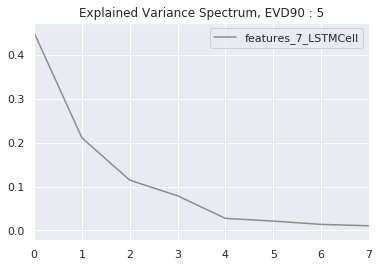

In [139]:
goal = 0
EVs = []
titles = []
for i, (feature_name, feature_datum) in enumerate(zip(feature_names, feature_data)):
#     if feature_name in ['features_1_ReLU', 'features_4_ReLU', 'features_6_ReLU', 'features_7_LSTMCell']:
    if feature_name in ['features_7_LSTMCell']:
        feature_datum = feature_datum[all_trial_state==goal]
        EV = get_EV(feature_datum)
#         EV = EV/np.max(EV)
        EV_frame = pd.DataFrame(columns=[feature_name],data=EV)
        ax = sns.lineplot(data=EV_frame, palette=[sns.color_palette()[i]])
#         ax.set_xscale('log')
#         ax.set_yscale('log')
        ax.set_xlim([0,7])
        EVD = np.sum([EV.cumsum()<.9])
        ax.set_title('Explained Variance Spectrum, EVD90 : {}'.format(EVD))
        break

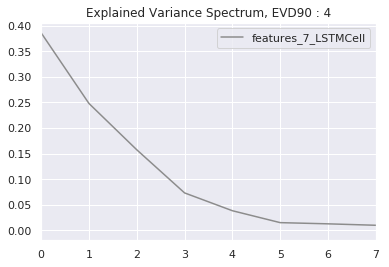

In [140]:
goal = 1
EVs = []
titles = []
for i, (feature_name, feature_datum) in enumerate(zip(feature_names, feature_data)):
#     if feature_name in ['features_1_ReLU', 'features_4_ReLU', 'features_6_ReLU', 'features_7_LSTMCell']:
    if feature_name in ['features_7_LSTMCell']:
        feature_datum = feature_datum[all_trial_state==goal]
        EV = get_EV(feature_datum)
#         EV = EV/np.max(EV)
        EV_frame = pd.DataFrame(columns=[feature_name],data=EV)
        ax = sns.lineplot(data=EV_frame, palette=[sns.color_palette()[i]])
#         ax.set_xscale('log')
#         ax.set_yscale('log')
        ax.set_xlim([0,7])
        EVD = np.sum([EV.cumsum()<.9])
        ax.set_title('Explained Variance Spectrum, EVD90 : {}'.format(EVD))
        break

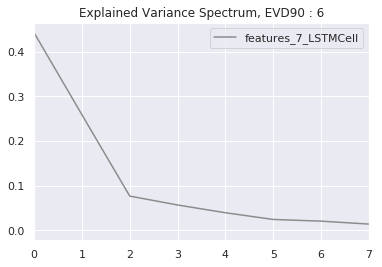

In [141]:
goal = 2
EVs = []
titles = []
for i, (feature_name, feature_datum) in enumerate(zip(feature_names, feature_data)):
#     if feature_name in ['features_1_ReLU', 'features_4_ReLU', 'features_6_ReLU', 'features_7_LSTMCell']:
    if feature_name in ['features_7_LSTMCell']:
        feature_datum = feature_datum[all_trial_state==goal]
        EV = get_EV(feature_datum)
#         EV = EV/np.max(EV)
        EV_frame = pd.DataFrame(columns=[feature_name],data=EV)
        ax = sns.lineplot(data=EV_frame, palette=[sns.color_palette()[i]])
#         ax.set_xscale('log')
#         ax.set_yscale('log')
        ax.set_xlim([0,7])
        EVD = np.sum([EV.cumsum()<.9])
        ax.set_title('Explained Variance Spectrum, EVD90 : {}'.format(EVD))
        break

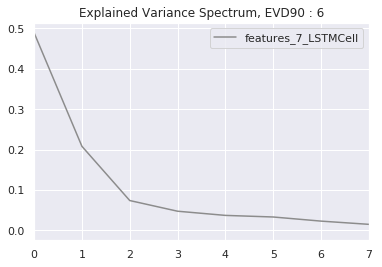

In [177]:
mask = ((annotation_data['goal']==0)&(annotation_data['see_key']==1)).values
mask = ((annotation_data['goal']==0)&(annotation_data['see_key']==0)).values
EVs = []
titles = []
for i, (feature_name, feature_datum) in enumerate(zip(feature_names, feature_data)):
#     if feature_name in ['features_1_ReLU', 'features_4_ReLU', 'features_6_ReLU', 'features_7_LSTMCell']:
    if feature_name in ['features_7_LSTMCell']:
        feature_datum = feature_datum[mask]
        EV = get_EV(feature_datum)
#         EV = EV/np.max(EV)
        EV_frame = pd.DataFrame(columns=[feature_name],data=EV)
        ax = sns.lineplot(data=EV_frame, palette=[sns.color_palette()[i]])
#         ax.set_xscale('log')
#         ax.set_yscale('log')
        ax.set_xlim([0,7])
        EVD = np.sum([EV.cumsum()<.9])
        ax.set_title('Explained Variance Spectrum, EVD90 : {}'.format(EVD))
        break

In [181]:
mask[:13]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False])

In [175]:
def shift_back_by_one
for i, v in enumerate(mask):
    if i > 0:
        if not v:
            mask[i-1] = v

In [165]:
mask.values

array([ True,  True,  True, ..., False, False, False])

In [178]:
x = feature_data[7][mask]
n = 3
pcs = ['pc'+str(i) for i in range(n)]
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns=pcs)

In [183]:
principalDf[:11]

,pc0,pc1,pc2
0,1.155872,-0.082371,0.270341
1,1.089792,-0.157795,-0.251040
2,0.227271,0.306625,-0.330156
3,0.015778,0.225241,-0.231965
4,-0.111489,0.092035,-0.087881
5,0.501754,-0.302659,0.082324
6,0.561389,-0.380732,-0.086549
7,0.501119,-0.408203,-0.149457
8,-0.498603,0.162882,-0.193395
9,-0.751618,0.465442,0.020098


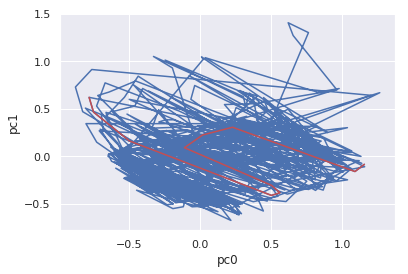

In [184]:
# outline linear projection of manifold
ax = sns.lineplot(x='pc0', y='pc1', sort=False, data=principalDf)
ax = sns.lineplot(x='pc0', y='pc1', sort=False, color='r', data=principalDf[:11])
xlims = ax.get_xlim()
ylims = ax.get_ylim()
plt.show()

# # project a single trace annotated by goal states onto manifold
# all_trial_traj = principalDf.values[:]
# all_trial_state = annotation_data['goal'].values[:]
# for goal in range(0,3):
#     goal_traj = all_trial_traj[all_trial_state==goal]
#     ax = sns.lineplot(goal_traj[:,0],goal_traj[:,1], sort=False, color=cmap[goal])
#     ax.set_ylim(ylims)
#     ax.set_xlim(xlims)
#     plt.show()